In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sci

#Creates function to remove extra spaces in sim file
def cleanlines(line):
    remove = ['  ', ' ']
    for r in remove:
        clean = line.replace(r, '') 
    split = clean.split(';')
    return split

In [2]:
#Opens sim file
data = open('AttenuatedConcreteModel.inc1.id1.sim', 'r').read()
lines = data.split('\n')

In [3]:
#Creates empty array for x, y, and z value of hits
darrell_arr = np.dtype({"names": ['x_value', 'y_value','z_value'], "formats": [np.float32, np.float32, np.float32]})
xlist = []
ylist = []
zlist = []

#Tallies total hits in detector
c = 0
for l in lines:
    line  = cleanlines(l)
    #print(line[0][2:6])
    if len(line) > 1 and line[0][2:6] == 'BLAK':
        #print(line)
        c +=1
        #Tallies coordinates of hits
        xlist.append(np.float32(line[4]))
        ylist.append(np.float32(line[5]))
        zlist.append(np.float32(line[6]))
print(c)
        
#Places x, y, and z values in new array
useful_arr = np.zeros(len(xlist), darrell_arr)
useful_arr['x_value'] = xlist
useful_arr['y_value'] = ylist
useful_arr['z_value'] = zlist
useful_arr[:10]

190688


array([(-747.6361084 ,   59.50020981,  347.70690918),
       (  92.19454956,  744.31188965,  491.29049683),
       ( 606.77062988, -440.82806396,  182.18283081),
       (-409.82925415, -628.12420654,  801.74615479),
       (-741.56542969,  112.16400146,  552.41571045),
       (-324.28405762, -676.26904297,  304.61437988),
       (  -9.92967033,  749.93426514,  835.17224121),
       ( 599.9418335 , -450.07754517,  868.36138916),
       ( 644.78796387,  383.07763672,  524.40997314),
       ( 708.53448486,  245.92454529,  677.59393311)],
      dtype=[('x_value', '<f4'), ('y_value', '<f4'), ('z_value', '<f4')])

In [4]:
#Converts x and y into phi -180 to 180 degrees
phi = np.arctan2(useful_arr['y_value'],useful_arr['x_value'])*180/np.pi
phi[:10]

array([ 175.44972229,   82.93899536,  -35.99897003, -123.1230545 ,
        171.39903259, -115.6186142 ,   90.7585907 ,  -36.87730408,
         30.71514511,   19.141325  ], dtype=float32)

In [5]:
#Confirms constant r of 750 cm
r = np.sqrt(useful_arr['x_value']**2+useful_arr['y_value']**2)
r[:10]

array([ 750.        ,  750.        ,  750.        ,  750.00006104,
        750.00006104,  749.99993896,  750.        ,  750.        ,
        750.        ,  750.        ], dtype=float32)

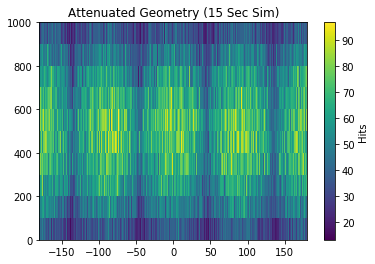

In [6]:
heatmap, xedges, yedges = np.histogram2d(phi,useful_arr['z_value'], bins=[360,10])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, extent=extent, aspect='auto', origin='lower')
cb = plt.colorbar()
cb.set_label('Hits')
plt.title('Attenuated Geometry (15 Sec Sim)')
plt.savefig('Attenuated_15sec.png')
plt.show()

In [7]:
plt.imshow?